In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
#Homework : Writing up observations
#Within a jupyter cell and also in Readme


# Study data files
mouse_metadata = "/Users/mikan/Documents/Data Science Bootcamp/Matplotlib_Homework/Mouse_metadata.csv"
study_results = "/Users/mikan/Documents/Data Science Bootcamp/Matplotlib_Homework/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Group the data by Drug Regimen
drug_groups = combined_mouse_df.groupby('Drug Regimen')

# mean tumor volume
mean_tumor_vol=drug_groups["Tumor Volume (mm3)"].mean()
mean_tumor_vol

# median tumor volume
median_tumor_vol=drug_groups["Tumor Volume (mm3)"].median()
median_tumor_vol

# variance tumore volume
var_tumor_vol=drug_groups["Tumor Volume (mm3)"].var()
var_tumor_vol

# standard deviation tumor volume
std_tumor_vol=drug_groups["Tumor Volume (mm3)"].std()
std_tumor_vol

# SEM of the tumor volume
sem_tumor_vol=drug_groups["Tumor Volume (mm3)"].sem()
sem_tumor_vol

# Put them together in data frame
summary_df=pd.merge(mean_tumor_vol, median_tumor_vol, how="inner", on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)_x":"Mean", "Tumor Volume (mm3)_y":"Median"})

summary_df2=pd.merge(summary_df, var_tumor_vol, how="inner", on="Drug Regimen")
summary_df2 = summary_df2.rename(columns={"Tumor Volume (mm3)" : "Variance"})

summary_df3=pd.merge(summary_df2, std_tumor_vol, how="inner", on="Drug Regimen")
summary_df3 = summary_df3.rename(columns={"Tumor Volume (mm3)" : "Standard Deviation"})

summary_df4=pd.merge(summary_df3, sem_tumor_vol, how="inner", on="Drug Regimen")
summary_df4 = summary_df4.rename(columns={"Tumor Volume (mm3)" : "SEM"})
summary_df4


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


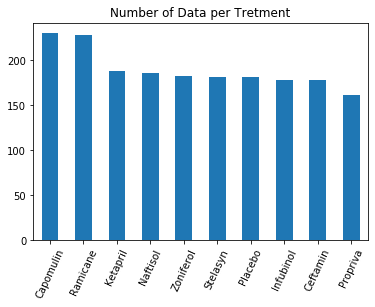

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_count=combined_mouse_df["Drug Regimen"].value_counts()
mouse_chart = mouse_count.plot(kind="bar", title="Number of Data per Tretment", rot=65)

In [7]:
mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

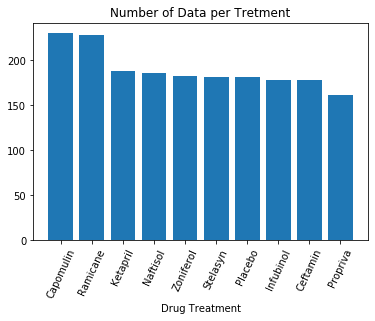

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(mouse_count.index.values,mouse_count.values) 
plt.xticks(rotation=65)
plt.title("Number of Data per Tretment")
plt.xlabel("Drug Treatment")
plt.show()

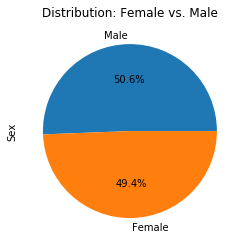

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count=combined_mouse_df["Sex"].value_counts()
gender_count
gender_chart = gender_count.plot(kind="pie", title="Distribution: Female vs. Male", autopct="%1.1f%%")

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count

Male      958
Female    935
Name: Sex, dtype: int64

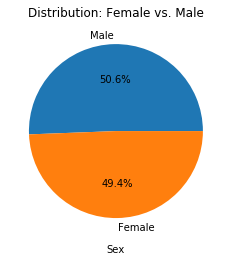

In [11]:
plt.pie(gender_count.values,labels=gender_count.index,autopct="%1.1f%%");
plt.title("Distribution: Female vs. Male")
plt.xlabel("Sex")
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin, Ramicane, Infubinol, and Ceftamin.

# Use combined_mouse_df
# Group by Moouse ID. Within the data of a specific mouse, get max value of timepoint 
final_vol=combined_mouse_df.groupby(["Mouse ID"]).max()
final_vol=final_vol.reset_index()

# Keep just Mouse ID and max Timepoint in final_vol. Merge the original data frame on these two variables
# so, I can bring other data including Tumour volumne back onto the max timepoint for a specific mouse
merged_data=final_vol[["Mouse ID", "Timepoint"]].merge(combined_mouse_df,on=["Mouse ID", "Timepoint"], how='left')
merged_data

# Drug Regimen and their tumore volume for the max time point
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
capomulin


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Calculate the IQR for capomulin, and quantitatively determine if there are any potential outliers. 
quartiles = capomulin.quantile([.25,.5,.75])
quartiles

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(quartiles)
print(f"iqr is {iqr}")
print(f"Lower_bound is {lower_bound}. Lower than {lower_bound} is outlier")
print(f'Uupper_bound is {upper_bound}. Higher than {upper_bound} is outlier')

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
iqr is 7.781863460000004
Lower_bound is 20.70456164999999. Lower than 20.70456164999999 is outlier
Uupper_bound is 51.83201549. Higher than 51.83201549 is outlier


In [14]:
Ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Ramicane

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Calculate the IQR for Ramicane, and quantitatively determine if there are any potential outliers. 
quartiles = Ramicane.quantile([.25,.5,.75])
quartiles

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(quartiles)
print(f"iqr is {iqr}")
print(f"Lower_bound is {lower_bound}. Lower than {lower_bound} is outlier")
print(f'Uupper_bound is {upper_bound}. Higher than {upper_bound} is outlier')

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
iqr is 9.098536719999998
Lower_bound is 17.912664470000003. Lower than 17.912664470000003 is outlier
Uupper_bound is 54.30681135. Higher than 54.30681135 is outlier


In [16]:
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
Infubinol

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
124    47.010364
130    60.165180
142    55.629428
143    45.699331
154    54.656549
171    55.650681
198    46.250112
201    54.048608
203    51.542431
212    50.005138
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Calculate the IQR for Infubinol, and quantitatively determine if there are any potential outliers. 
quartiles = Infubinol.quantile([.25,.5,.75])
quartiles

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(quartiles)
print(f"iqr is {iqr}")
print(f"Lower_bound is {lower_bound}. Lower than {lower_bound} is outlier")
print(f'Uupper_bound is {upper_bound}. Higher than {upper_bound} is outlier')

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
iqr is 11.477135160000003
Lower_bound is 36.83290494999999. Lower than 36.83290494999999 is outlier
Uupper_bound is 82.74144559000001. Higher than 82.74144559000001 is outlier


In [18]:
Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
Ceftamin

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# Calculate the IQR for Ceftamin, and quantitatively determine if there are any potential outliers. 
quartiles = Ceftamin.quantile([.25,.5,.75])
quartiles

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(quartiles)
print(f"iqr is {iqr}")
print(f"Lower_bound is {lower_bound}. Lower than {lower_bound} is outlier")
print(f'Uupper_bound is {upper_bound}. Higher than {upper_bound} is outlier')

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
iqr is 15.577752179999997
Lower_bound is 25.355449580000002. Lower than 25.355449580000002 is outlier
Uupper_bound is 87.66645829999999. Higher than 87.66645829999999 is outlier


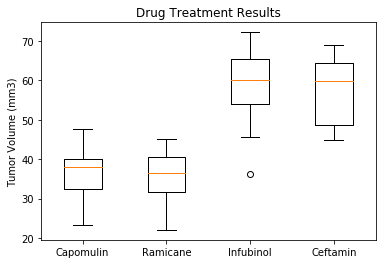

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Combine the different drug treatment results into one list  
# reference : http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
combined_data = [capomulin, Ramicane, Infubinol, Ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Treatment Results')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(combined_data)
plt.show()

           Age_months  Weight (g)  Tumor Volume (mm3)  Metastatic Sites
Timepoint                                                              
0           14.040000   20.120000           45.000000          0.000000
5           14.040000   20.120000           44.266086          0.160000
10          14.040000   20.120000           43.084291          0.320000
15          13.666667   20.000000           42.064317          0.375000
20          13.304348   19.782609           40.716325          0.652174
25          13.181818   19.909091           39.939528          0.818182
30          13.181818   19.909091           38.769339          1.090909
35          13.181818   19.909091           37.816839          1.181818
40          12.809524   19.857143           36.958001          1.380952
45          12.809524   19.857143           36.236114          1.476190


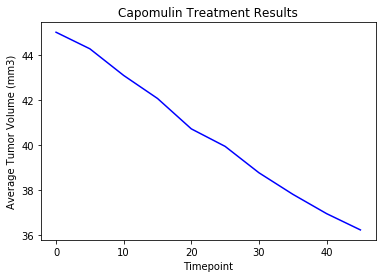

In [56]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# referece https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

# Keep data for mice with capomulin 
capomulin_mouse = combined_mouse_df.loc[combined_mouse_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse

# Calculate average tumor volume per timepoint
# So,timepoint is set as index automatically
avg_capomulin_mouse=capomulin_mouse.groupby('Timepoint').mean()
print(avg_capomulin_mouse)

# Keep Tumor Volume (mm3)
vol=avg_capomulin_mouse.iloc[:,2]

# Use index as x-axis. Average tumor vol is y-axis
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Treatment Results')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel('Timepoint')
ax1.plot(vol, color="blue", label="Tumor Volume" )


   Weight (g)  Avg Tumor Volume
0          15         36.182040
1          17         37.214133
2          19         41.182391
3          20         39.141053
4          21         42.088700
5          22         43.288490
6          23         43.341051
7          24         44.805810
8          25         44.062109


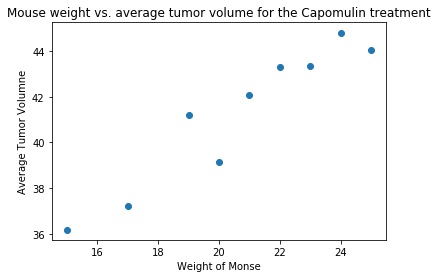

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# Keep data for mice with capomulin 
capomulin_mouse = combined_mouse_df.loc[combined_mouse_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse

# Calculate average tumor volume per mouse weight
weight_group_mean_value=capomulin_mouse.groupby('Weight (g)').mean()
weight_group_mean_value

# Create data frame containing weight and mean tumor volume
# In this way, I can set weight to NOT-to be index
# reference : https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
# list of weights
lst1 = [15,17,19,20,21,22,23,24,25] 
  
# list of tumor sizes
lst2 = [36.182040, 37.214133, 41.182391, 39.141053, 42.088700, 43.288490, 43.341051, 44.805810, 44.062109] 

# Calling DataFrame constructor after zipping both lists, with column names specified 
df = pd.DataFrame(list(zip(lst1, lst2)), columns =['Weight (g)', 'Avg Tumor Volume']) 
print(df)

# Specify x-axis and y-axis
weight_x=df['Weight (g)']
tumor_y=df['Avg Tumor Volume']

plt.scatter(weight_x,tumor_y)
plt.xlabel('Weight of Monse')
plt.ylabel('Average Tumor Volumne')
plt.title('Mouse weight vs. average tumor volume for the Capomulin treatment')
plt.show()

The correlation between the weights of mouse and average tumor sizes is 0.95
Regression equasion is 0.89 x weight of mouse + 22.76


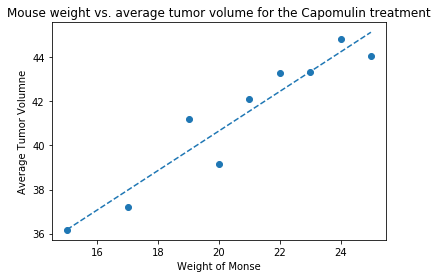

In [48]:
#  Calculate the correlation coefficient and linear regression model 
#  for mouse weight and average tumor volume for the Capomulin regimen.
#  Plot the linear regression model on top of the previous scatter plot.

correlation = st.pearsonr(weight_x,tumor_y)
print(f"The correlation between the weights of mouse and average tumor sizes is {round(correlation[0],2)}")

# Perform a linear regression on Weight of Monse versus Average Tumor Volumne
t_slope, t_int, t_r, t_p, t_std_err = st.linregress(weight_x, tumor_y)
print(f"Regression equasion is {round(t_slope,2)} x weight of mouse + {round(t_int,2)}")

# Create equation of line to calculate predicted violent crime rate
t_fit = t_slope *weight_x  + t_int

# Plot the linear model on top of scatter plot 
# Specify x-axis and y-axis
weight_x=df['Weight (g)']
tumor_y=df['Avg Tumor Volume']

plt.scatter(weight_x,tumor_y)
plt.plot(weight_x,t_fit,"--")
plt.xlabel('Weight of Monse')
plt.ylabel('Average Tumor Volumne')
plt.title('Mouse weight vs. average tumor volume for the Capomulin treatment')
plt.show()
